In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
d = pd.read_excel('/content/DM_Sales.xls')

In [ ]:
d.sample(5)

,index,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,...,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
6513,5802,13470,90,3093,2017-10-23 00:00:00,1.0,Approved,Solex,Standard,low,...,Crimes,Male,31,Mechanical Systems Engineer,Property,High Net Worth,N,Yes,6.0,997097450985623040
14287,103,5681,32,2717,2017-11-19 00:00:00,1.0,Approved,Giant Bicycles,Standard,medium,...,McGown,Male,31,Registered Nurse,Health,Mass Customer,N,No,13.0,1344857450985623040
8517,13557,11462,88,2007,2017-08-08 00:00:00,1.0,Approved,Norco Bicycles,Standard,medium,...,Scarrisbrick,Male,8,Programmer I,Manufacturing,Mass Customer,N,Yes,15.0,1690371050985623040
6580,6706,13403,51,2372,2017-09-04 00:00:00,0.0,Approved,OHM Cycles,Standard,high,...,Shoppee,Male,14,Clinical Specialist,Health,Affluent Customer,N,No,10.0,1456486250985623040
12709,18485,7260,9,2315,2017-02-06 00:00:00,1.0,Approved,OHM Cycles,Road,medium,...,MacCheyne,Male,25,Community Outreach Specialist,Financial Services,Affluent Customer,N,No,8.0,936703850985623040


In [ ]:
d.isna().sum()

index                                     0
transaction_id                            0
product_id                                0
customer_id                               0
transaction_date                          0
online_order                            359
order_status                              0
brand                                   194
product_line                            194
product_class                           194
product_size                            194
list_price                                0
standard_cost                           194
product_first_sold_date                 194
address                                   0
postcode                                  0
state                                     0
property_valuation                        0
first_name                                0
last_name                               642
gender                                    0
past_3_years_bike_related_purchases       0
job_title                       

In [ ]:
d.nunique()

index                                  19959
transaction_id                         19959
product_id                               101
customer_id                             3488
transaction_date                         364
online_order                               2
order_status                               2
brand                                      6
product_line                               4
product_class                              3
product_size                               3
list_price                               293
standard_cost                            100
product_first_sold_date                  100
address                                 3486
postcode                                 835
state                                      5
property_valuation                        12
first_name                              2834
last_name                               3262
gender                                     3
past_3_years_bike_related_purchases      100
job_title 

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19959 entries, 0 to 19958
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   index                                19959 non-null  int64  
 1   transaction_id                       19959 non-null  int64  
 2   product_id                           19959 non-null  int64  
 3   customer_id                          19959 non-null  int64  
 4   transaction_date                     19959 non-null  object 
 5   online_order                         19600 non-null  float64
 6   order_status                         19959 non-null  object 
 7   brand                                19765 non-null  object 
 8   product_line                         19765 non-null  object 
 9   product_class                        19765 non-null  object 
 10  product_size                         19765 non-null  object 
 11  list_price                  

In [ ]:
d.owns_car.value_counts()

Yes    10042
No      9917
Name: owns_car, dtype: int64

In [ ]:
d.order_status.value_counts()

Approved     19781
Cancelled      178
Name: order_status, dtype: int64

In [ ]:
d.online_order.value_counts()

1.0    9815
0.0    9785
Name: online_order, dtype: int64

In [ ]:
d.gender.value_counts()

Female     9997
Male       9516
Unknown     446
Name: gender, dtype: int64

In [ ]:
d.gender = d.gender.replace('F', 'Female')
d.gender = d.gender.replace('Femal', 'Female')
d.gender = d.gender.replace('M', 'Male')
d.gender = d.gender.replace('U', 'Unknown')

In [ ]:
d.gender.value_counts()

Female     9997
Male       9516
Unknown     446
Name: gender, dtype: int64

In [ ]:
d.deceased_indicator.value_counts()

N    19951
Y        8
Name: deceased_indicator, dtype: int64

In [ ]:
d.online_order.value_counts()

1.0    9815
0.0    9785
Name: online_order, dtype: int64

In [ ]:
d.transaction_date

0        2017-09-22 00:00:00
1        2017-07-03 00:00:00
2        2017-04-14 00:00:00
3        2017-11-09 00:00:00
4        2017-06-24 00:00:00
                ...         
19954    2017-10-01 00:00:00
19955    2017-08-31 00:00:00
19956    2017-10-16 00:00:00
19957    2017-05-21 00:00:00
19958    2017-02-25 00:00:00
Name: transaction_date, Length: 19959, dtype: object

In [ ]:
d["transaction_date"] = pd.to_datetime(d["transaction_date"])


In [ ]:
d['product_first_sold_date'].mode()
d.product_first_sold_date

0        1999-06-25 00:00:00
1        2004-08-19 00:00:00
2        2010-08-22 00:00:00
3        1997-05-12 00:00:00
4        2003-07-23 00:00:00
                ...         
19954    2015-08-12 00:00:00
19955    1998-12-18 00:00:00
19956    1999-07-22 00:00:00
19957    2014-03-05 00:00:00
19958    2012-12-04 00:00:00
Name: product_first_sold_date, Length: 19959, dtype: object

In [ ]:
d['owns_car'] = d['owns_car'].map(lambda x: 1 if x == 'Yes' else 0)
d['deceased_indicator'] = d['deceased_indicator'].map(lambda x: 1 if x == 'Y' else 0)

In [ ]:
d.sample(3)

,index,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,...,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
7219,9062,12762,70,2019,2017-05-07,1.0,Approved,Norco Bicycles,Road,medium,...,Perkis,Female,48,VP Marketing,Entertainment,High Net Worth,0,0,17.0,2213609450985623040
10437,19336,9538,23,3385,2017-11-06,0.0,Approved,Norco Bicycles,Mountain,low,...,NaN,Female,23,Systems Administrator III,Argiculture,Mass Customer,0,0,9.0,1537961450985623040
15620,14530,4345,47,2937,2017-06-12,1.0,Approved,Trek Bicycles,Road,low,...,Mitchener,Female,47,Computer Systems Analyst I,Financial Services,Mass Customer,0,0,15.0,1554895850985623040


In [ ]:
d.columns

Index(['index', 'transaction_id', 'product_id', 'customer_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'address', 'postcode',
       'state', 'property_valuation', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'age'],
      dtype='object')

In [ ]:
num_features = d.select_dtypes(include = np.number)
num_features.isna().sum()

index                                    0
transaction_id                           0
product_id                               0
customer_id                              0
online_order                           359
list_price                               0
standard_cost                          194
postcode                                 0
property_valuation                       0
past_3_years_bike_related_purchases      0
deceased_indicator                       0
owns_car                                 0
tenure                                 446
age                                      0
dtype: int64

In [ ]:
d = d.fillna(d.median(axis=0), axis=0)

<ipython-input-22-c4e380e8b79c>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  d = d.fillna(d.median(axis=0), axis=0)
<ipython-input-22-c4e380e8b79c>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  d = d.fillna(d.median(axis=0), axis=0)


In [ ]:
d.isna().sum()

index                                     0
transaction_id                            0
product_id                                0
customer_id                               0
transaction_date                          0
online_order                              0
order_status                              0
brand                                   194
product_line                            194
product_class                           194
product_size                            194
list_price                                0
standard_cost                             0
product_first_sold_date                 194
address                                   0
postcode                                  0
state                                     0
property_valuation                        0
first_name                                0
last_name                               642
gender                                    0
past_3_years_bike_related_purchases       0
job_title                       

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19959 entries, 0 to 19958
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   index                                19959 non-null  int64         
 1   transaction_id                       19959 non-null  int64         
 2   product_id                           19959 non-null  int64         
 3   customer_id                          19959 non-null  int64         
 4   transaction_date                     19959 non-null  datetime64[ns]
 5   online_order                         19959 non-null  float64       
 6   order_status                         19959 non-null  object        
 7   brand                                19765 non-null  object        
 8   product_line                         19765 non-null  object        
 9   product_class                        19765 non-null  object        
 10  product_si

In [ ]:
for el in num_features:
    for n_type in (np.int32, np.int16, np.int8):
        if (d[el] == d[el].astype(n_type)).sum() == len(d):
            d[el] = d[el].astype(n_type)

In [ ]:
d1 = pd.DataFrame()
d1['order_status'] = d['order_status']

In [ ]:
d = d.drop(columns=['order_status'], axis=1)

In [ ]:
cat_feat = d.select_dtypes(include = 'object')
cat_feat.columns

Index(['brand', 'product_line', 'product_class', 'product_size',
       'product_first_sold_date', 'address', 'state', 'first_name',
       'last_name', 'gender', 'job_title', 'job_industry_category',
       'wealth_segment'],
      dtype='object')

In [ ]:
data_describe = d.describe(include=[object])
for feature in cat_feat:
    d[feature] = d[feature].fillna(data_describe[feature]['top'])


In [ ]:
d['target'] = d1['order_status']

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19959 entries, 0 to 19958
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   index                                19959 non-null  int16         
 1   transaction_id                       19959 non-null  int16         
 2   product_id                           19959 non-null  int8          
 3   customer_id                          19959 non-null  int16         
 4   transaction_date                     19959 non-null  datetime64[ns]
 5   online_order                         19959 non-null  int8          
 6   brand                                19959 non-null  object        
 7   product_line                         19959 non-null  object        
 8   product_class                        19959 non-null  object        
 9   product_size                         19959 non-null  object        
 10  list_price

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
for i in cat_feat:
  lb = LabelEncoder()
  d[i] = lb.fit_transform(d[i].astype(str))

In [ ]:
d.sample(2)

,index,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,target
11969,9506,8003,85,1845,2017-12-09,1,5,2,2,1,...,1,34,76,2,2,0,0,6,1445427050985623040,Approved
9773,15720,10203,24,186,2017-08-07,1,3,1,2,0,...,0,46,159,2,2,0,0,3,1562153450985623040,Approved


In [ ]:
d = d.drop(columns=['transaction_id', 'postcode', 'address', 'first_name', 'last_name',
                     'product_id', 'standard_cost', 'product_first_sold_date', 'transaction_date'], axis=1)

<ipython-input-36-30c82b709bf3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(d.corr(), annot = True, linewidths=.6, cmap = 'YlGnBu')


<Axes: >

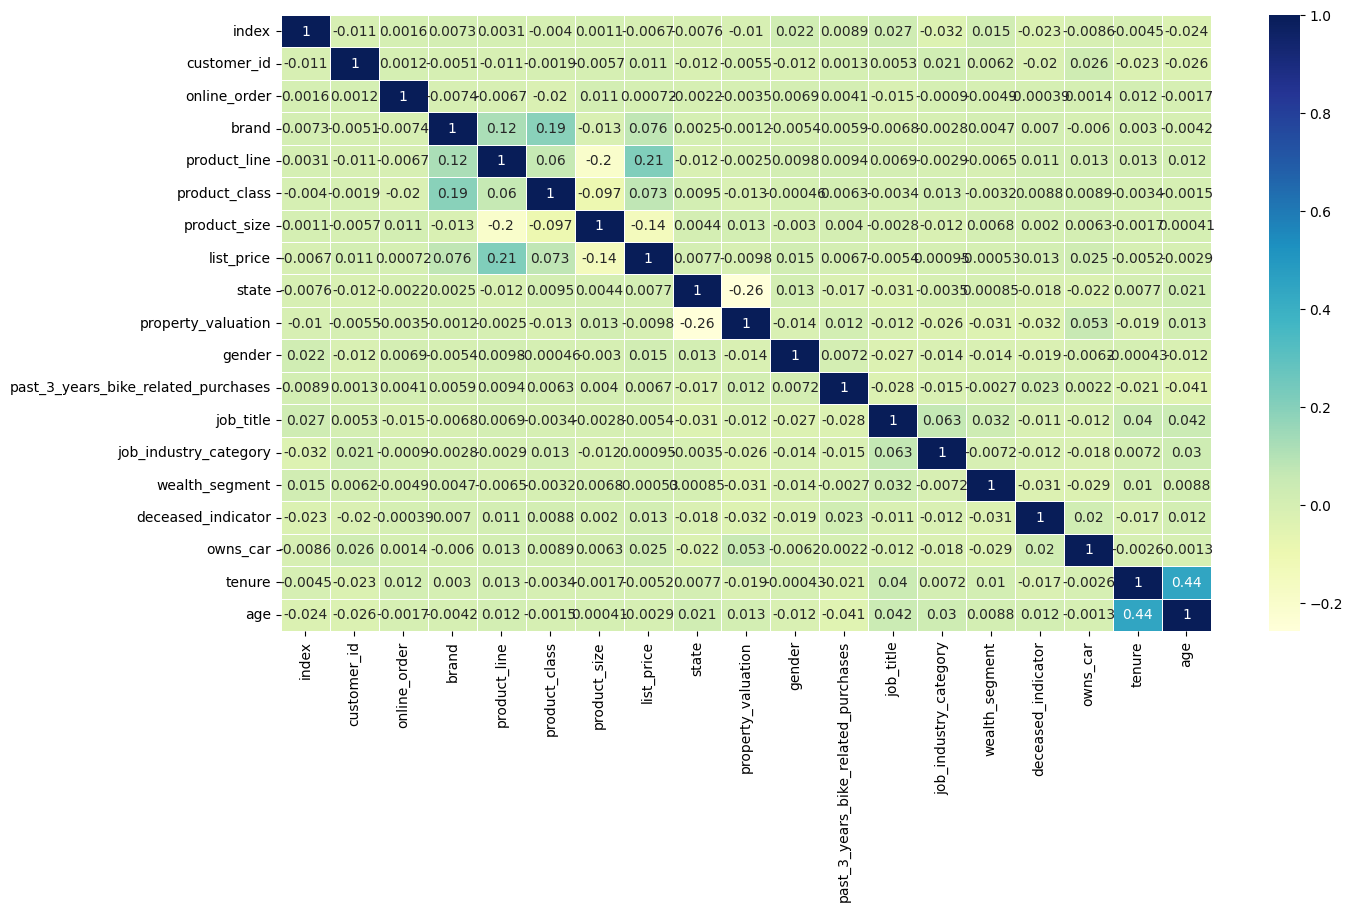

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(d.corr(), annot = True, linewidths=.6, cmap = 'YlGnBu')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_data, test_data = train_test_split(d, random_state=42, test_size=0.2)

In [ ]:
X_train = train_data.drop(['target'], axis=1)
y_train = train_data['target']

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
X_test = test_data.drop(['target'], axis=1)
y_test = test_data['target']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
scaled_minmax = minmax.fit_transform(X_train)
scaled_minmax_X_train = pd.DataFrame(scaled_minmax, columns = X_train.columns)
scaled_minmax_X_test = pd.DataFrame(scaled_minmax, columns = X_test.columns)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, classification_report, recall_score


In [ ]:
lr =LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predict = lr.predict(X_test)

In [ ]:
predict_proba = lr.predict_proba(X_test)[:, 1]
predict_proba

array([0.50027015, 0.50050903, 0.50051641, ..., 0.50067424, 0.50055612,
       0.50068057])

In [ ]:
metrics = {
    "f1": f1_score(y_test, predict, pos_label='Cancelled'),
    "recall": recall_score(y_test, predict, pos_label='Cancelled'),
    "precision": precision_score(y_test, predict, pos_label='Cancelled'),
    "ROC_AUC" :roc_auc_score(y_test, predict_proba)}
metrics

{'f1': 0.017874875868917575,
 'recall': 1.0,
 'precision': 0.009018036072144289,
 'ROC_AUC': 0.5933146556566677}

In [ ]:
print(classification_report(y_test, predict))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Approved       0.00      0.00      0.00      3956
   Cancelled       0.01      1.00      0.02        36

    accuracy                           0.01      3992
   macro avg       0.00      0.50      0.01      3992
weighted avg       0.00      0.01      0.00      3992

